In [1]:
# import pandas_datareader as pdr
# import yahoo_finance as yf
# import quandl as ql

In [1]:
import investpy as ip
import pandas as pd
from datetime import date, timedelta

class Funds():
    
    def __init__(self, portfolio=None, isins=None):
        if portfolio is not None:
            self.portfolio = self.get_portfolio(portfolio)
        elif isins is not None:
            self.portfolio = pd.DataFrame([{'isin': i, 'amount': None, 'bought_kurs': None, 'bought_date': None}
                                           for i in isins])
        self.funds = None
        self.timeseries = None

    def get_funds(self):
        if self.funds is None:
            self.get_info()
        return self.funds
    
    def get_info(self):
        infos = []
        for i in self.portfolio.index:
            try:
                infos.append(ip.search_funds('isin', self.portfolio.at[i,'isin']))
            except RuntimeError:
                print(self.portfolio.at[i,'isin'] + ' not found. dropped from portfolio')
                self.portfolio.drop(i, inplace=True)
        self.funds = pd.concat(infos, ignore_index=True)
        
        self.funds = self.funds.join(pd.concat([ip.get_fund_information(self.funds.at[i,'name'], self.funds.at[i,'country'])
                                                for i in self.funds.index], ignore_index=True))
        return self.funds
    
    def get_portfolio(self, portfolio):
        if isinstance(portfolio, list):
            self.portfolio = pd.DataFrame(portfolio)
        elif isinstance(portfolio, pd.DataFrame):
            self.portfolio = portfolio
        return self.portfolio
    
    def get_timeseries(self, from_date, to_date='today', interval='Daily', ohlc='Close'):
        if self.funds is None:
            self.get_info()
        
        if from_date == 'today':
            from_date = date.today()
        else:
            from_date = date.fromisoformat(from_date)
        
        if to_date == 'today':
            to_date = date.today()
        else:
            to_date = date.fromisoformat(to_date)
        
        self.timeseries = []
        for i in self.funds.index:
            ts = ip.get_fund_historical_data(self.funds.at[i,'name'],
                                             self.funds.at[i,'country'],
                                             from_date=from_date.strftime('%d/%m/%Y'),
                                             to_date=to_date.strftime('%d/%m/%Y'),
                                             interval=interval)[ohlc]
            ts.name = self.funds.at[i,'isin']
            self.timeseries.append(ts)
        self.timeseries = pd.concat(self.timeseries, axis=1)
        
        return self.timeseries

In [3]:
portfolio = [{'isin':'DE000DK2CFR7',
              'amount': 83.961,
              'bought_kurs': 119.10,
              'bought_date': None},
             {'isin': 'DE0007483612',
              'amount': 113.823,
              'bought_kurs': 50.19,
              'bought_date': None},
             {'isin': 'LU0703711035',
              'amount': 125.098,
              'bought_kurs': 127.90,
              'bought_date': None},
             {'isin': 'LU0168341575',
              'amount': 187.99,
              'bought_kurs': 31.92,
              'bought_date': None},
             {'isin': 'LU0113257694',
              'amount': 191.388,
              'bought_kurs': 20.90,
              'bought_date': None}]

funds = Funds(portfolio=portfolio)
funds.get_info()
funds.get_timeseries(from_date='2020-02-20')

,DE000DK2CFR7,DE0007483612,LU0703711035,LU0168341575,LU0113257694
Date,,,,,
2020-02-20,120.34,54.40,134.41,46.50,24.058
2020-02-21,120.27,54.40,134.45,45.88,24.061
2020-02-24,120.03,54.41,134.40,44.49,24.045
2020-02-25,119.00,54.40,134.18,44.29,24.012
2020-02-26,118.37,54.40,133.80,43.32,23.940
...,...,...,...,...,...
2020-07-13,112.86,54.66,130.14,41.83,23.430
2020-07-14,112.81,54.67,130.07,40.99,23.472
2020-07-15,112.40,54.69,130.31,41.93,23.498


In [43]:
f = pd.read_csv('best.csv')
f = f[(f['initial_fee']<3)&(f['performance_cy']>0)].reset_index()
funds = Funds(portfolio=f[['isin']])
funds.get_info()
funds.get_timeseries(from_date='2020-02-20')

LU1851367950 not found. dropped from portfolio


/home/boris/miniconda3/envs/finance/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


LU1992136520 not found. dropped from portfolio
LU0772916010 not found. dropped from portfolio
LU1933087915 not found. dropped from portfolio
LU1173935773 not found. dropped from portfolio
LU1405890390 not found. dropped from portfolio
LU1728567212 not found. dropped from portfolio
LU1727504356 not found. dropped from portfolio
LU1727504430 not found. dropped from portfolio
LU1766616152 not found. dropped from portfolio
LU1901058575 not found. dropped from portfolio
LU1842711688 not found. dropped from portfolio
LI0348132148 not found. dropped from portfolio
LI0348132080 not found. dropped from portfolio
LI0348132296 not found. dropped from portfolio
LU0969484418 not found. dropped from portfolio
LU1507501481 not found. dropped from portfolio
AT00ZUKUNFT5 not found. dropped from portfolio
BE0173901779 not found. dropped from portfolio
LU0969484764 not found. dropped from portfolio
BE0945318534 not found. dropped from portfolio
LU0122292328 not found. dropped from portfolio
BE6253606162 

,country,name,symbol,issuer,isin,asset_class,currency,underlying,Fund Name,Rating,...,ROE,Issuer,Turnover,ROA,Inception Date,Total Assets,Expenses,Min Investment,Market Cap,Category
0,germany,Gls Bank Aktienfonds A,0P00011OD0,Universal-Investment GmbH,DE000A1W2CK8,equity,EUR,NaN,gls bank aktienfonds a,4,...,14%,Universal - Investment GmbH,None,"4,98%",16/12/2013,297480000,"1,54%",None,7750000000,RV Global Cap. Flexible
1,germany,Gls Bank Aktienfonds B,0P00011OD1,Universal-Investment GmbH,DE000A1W2CL6,equity,EUR,NaN,gls bank aktienfonds b,4,...,14%,Universal - Investment GmbH,None,"4,98%",16/12/2013,297480000,"0,88%",200000,7750000000,RV Global Cap. Flexible
2,luxembourg,Nordea 1 - North American Stars Equity Fund E Usd,0P0000WA7W,Nordea Investment Funds SA,LU0772958954,equity,USD,NaN,nordea 1 - north american stars equity fund e usd,3,...,"29,01%",Nordea Investment Funds SA,"155,09%","10,60%",30/05/2012,516970000,"2,55%",None,76800000000,RV USA Cap. Flexible
3,luxembourg,Bmo Responsible Global Equity Fund R Inc Eur,0P00011DFY,BMO (F&C Management Ltd),LU0969484335,equity,EUR,NaN,bmo responsible global equity fund r inc eur,3,...,"23,42%",BMO (F&C Management Ltd),"- 8,42%","8,99%",26/11/2013,1010000000,"1,05%",5000000,46230000000,RV Global Cap. Grande Growth
4,luxembourg,Nordea 1 - North American Stars Equity Fund E Eur,0P0000WA7V,Nordea Investment Funds SA,LU0772958798,equity,EUR,NaN,nordea 1 - north american stars equity fund e eur,3,...,"29,01%",Nordea Investment Funds SA,"155,09%","10,60%",30/05/2012,516970000,"2,57%",None,76800000000,RV USA Cap. Flexible
5,luxembourg,Nordea 1 - North American Stars Equity Fund Bi...,0P0000WA7S,Nordea Investment Funds SA,LU0772957808,equity,USD,NaN,nordea 1 - north american stars equity fund bi...,4,...,"29,01%",Nordea Investment Funds SA,"155,09%","10,60%",30/05/2012,516970000,"1,06%",75000,76800000000,RV USA Cap. Flexible
6,luxembourg,Nordea 1 - North American Stars Equity Fund Ai...,0P00013P10,Nordea Investment Funds SA,LU0772956743,equity,USD,NaN,nordea 1 - north american stars equity fund ai...,4,...,"29,01%",Nordea Investment Funds SA,"155,09%","10,60%",15/07/2014,516970000,"1,06%",75000,76800000000,RV USA Cap. Flexible
7,luxembourg,Candriam Sri Equity North America I - Cap - Usd,0P00017APB,Candriam Luxembourg,LU1313772748,equity,USD,NaN,candriam sri equity north america i - cap - usd,2,...,"28,29%",Candriam Luxembourg S.C.A.,None,"8,81%",29/12/2015,691710000,"0,65%",250000,78650000000,RV USA Cap. Grande Blend
8,luxembourg,Jss Sustainable Equity - Global Thematic I Eur...,0P0000J1L9,J. Safra Sarasin Fund Management (Luxembourg) ...,LU0405184523,equity,EUR,NaN,jss sustainable equity - global thematic i eur...,4,...,"23,97%",J. Safra Sarasin Fund Management (Luxembourg) ...,None,"8,58%",17/12/2008,623670000,"1,41%",1000000,48160000000,RV Global Cap. Grande Growth
9,luxembourg,Nordea 1 - North American Stars Equity Fund Bi...,0P0000WA7R,Nordea Investment Funds SA,LU0772957550,equity,EUR,NaN,nordea 1 - north american stars equity fund bi...,4,...,"29,01%",Nordea Investment Funds SA,"155,09%","10,60%",30/05/2012,516970000,"1,06%",75000,76800000000,RV USA Cap. Flexible


In [2]:
import plotly.express as px

X = (funds.timeseries / funds.timeseries.iloc[0]).unstack().reset_index()

px.line(X, x='Date', y=0, color='level_0')

NameError: name 'funds' is not defined

In [66]:
funds.funds[funds.funds['isin']=='LU0302446306']
# f[f['isin']=='LU0302446306']

,country,name,symbol,issuer,isin,asset_class,currency,underlying,Fund Name,Rating,...,ROE,Issuer,Turnover,ROA,Inception Date,Total Assets,Expenses,Min Investment,Market Cap,Category
11,luxembourg,Schroder International Selection Fund Global C...,0P00009BWJ,Schroder Investment Management Lux S.A.,LU0302446306,equity,USD,NaN,schroder international selection fund global c...,5,...,"13,17%",Schroder Investment Management Lux S.A.,None,"5,41%",29/06/2007,934870000,"0,06%",5000000,22490000000,RV Sector Ecología


In [27]:
i=4
isin = funds.portfolio.at[i,'isin']
df = funds.timeseries
df[isin].where(abs(df[isin]-funds.portfolio.at[i,'bought_kurs'])<1).dropna()

Date
2018-11-16    21.888
2018-11-19    21.831
2018-11-20    21.764
2018-11-21    21.762
2018-11-22    21.779
2018-11-23    21.820
2018-11-26    21.812
2018-11-27    21.807
2018-11-28    21.787
2018-11-29    21.784
2018-11-30    21.768
2018-12-03    21.778
2018-12-04    21.766
2018-12-05    21.723
2018-12-06    21.719
2018-12-07    21.690
2018-12-10    21.689
2018-12-11    21.685
2018-12-12    21.703
2018-12-13    21.753
2018-12-14    21.779
2018-12-17    21.777
2018-12-18    21.788
2018-12-19    21.786
2018-12-20    21.782
2018-12-21    21.754
2018-12-27    21.758
2018-12-28    21.762
2018-12-31    21.758
2019-01-02    21.813
2019-01-03    21.759
2019-01-04    21.708
2019-01-07    21.691
2019-01-08    21.669
2019-01-09    21.706
2019-01-10    21.730
2019-01-11    21.768
2019-01-14    21.777
2019-01-15    21.811
2019-01-16    21.839
2019-01-17    21.858
2019-01-18    21.872
2019-01-21    21.899
2019-01-23    21.897
2020-03-18    21.885
2020-03-19    21.196
2020-03-20    21.298
2020-03-

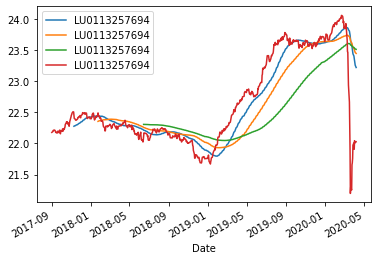

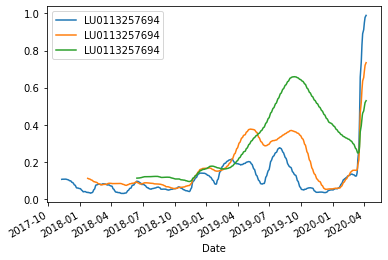

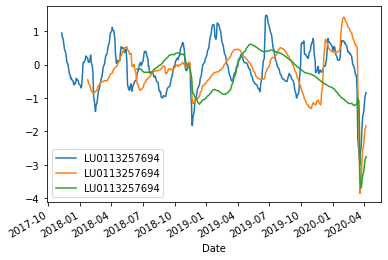

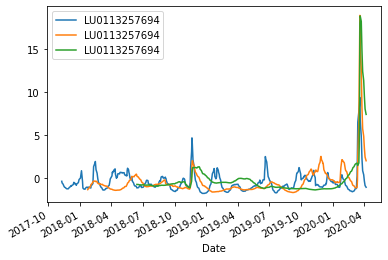

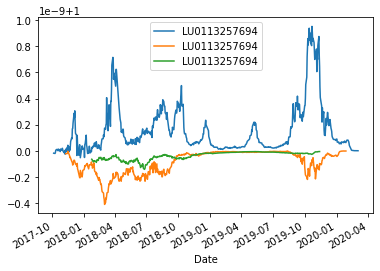

In [113]:
import statsmodels.tsa.stattools as tsa
import statsmodels.graphics.tsaplots as tsaplots
import statsmodels as sm
import numpy as np
import matplotlib.pyplot as plt

# funds.timeseries.plot()

ts = funds.timeseries.loc[:,funds.portfolio.at[4,'isin']].interpolate(method='time')

# ts.plot()

# tsaplots.plot_pacf(ts.dropna())

# tsa.adfuller(ts.dropna(), regression='ct')

pd.concat([ts.rolling(i, center=False).mean() for i in [50, 100, 200, 1]], axis=1).plot()
pd.concat([ts.rolling(i, center=False).std() for i in [50, 100, 200]], axis=1).plot()
pd.concat([ts.rolling(i, center=False).skew() for i in [50, 100, 200]], axis=1).plot()
pd.concat([ts.rolling(i, center=False).kurt() for i in [50, 100, 200]], axis=1).plot()

pd.concat([ts.rolling(i, center=True).corr() for i in [50, 100, 200]], axis=1).plot()